In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos 

In [3]:
df = pd.read_csv('sampled_data_25k.csv')

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour
0,2019-11-01 16:29:07+00:00,view,2500962,2053013564003713919,appliances.kitchen.oven,electrolux,463.20,516216750,026c0439-7540-4963-aba7-e753bd2a4ad3,16
1,2019-11-02 13:26:31+00:00,view,9600155,2053013561185141473,NaN,dji,468.19,512783488,080c2e91-e335-4a89-a889-0a5a619f9051,13
2,2019-11-01 17:49:29+00:00,view,14700670,2053013557133443581,furniture.living_room.cabinet,sv,123.53,513741357,a7685abc-71cf-45b3-9870-d344847fba0f,17
3,2019-11-01 14:50:45+00:00,view,3600145,2053013563810775923,appliances.kitchen.washer,indesit,169.63,530256322,a5ed5609-800d-4e95-a631-dd86d2da2b98,14
4,2019-11-02 08:18:23+00:00,view,18000258,2053013558525952589,NaN,samsung,6.41,512777444,ae2564fd-5166-4216-8914-77b16b0bae45,8


In [4]:
#verificar cantidad de valores nulos 

nulos = df.isnull().sum()
print('la cantidad de valores nulos es de:\n',nulos)

#verificar cantidad de valores duplicados

duplicados = df.duplicated().sum()
print('la cantidad de valores duplicados es de: ',duplicados)

la cantidad de valores nulos es de:
 event_time          0
event_type          0
product_id          0
category_id         0
category_code    8116
brand            3665
price               0
user_id             0
user_session        0
hour                0
dtype: int64
la cantidad de valores duplicados es de:  0


In [5]:
# Rellenar los nulos en 'category_code' y 'brand' con 'desconocido'
df['category_code'].fillna('desconocido', inplace=True)
df['brand'].fillna('desconocido', inplace=True)

# Verificar los cambios
print(df.isnull().sum())

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
hour             0
dtype: int64


In [6]:
# Convertir la columna 'event_time' a formato datetime
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# Verificar si la conversión fue exitosa
print(df['event_time'].head())

0   2019-11-01 16:29:07+00:00
1   2019-11-02 13:26:31+00:00
2   2019-11-01 17:49:29+00:00
3   2019-11-01 14:50:45+00:00
4   2019-11-02 08:18:23+00:00
Name: event_time, dtype: datetime64[ns, UTC]


# EDA

In [7]:
# 1. Resumen estadístico inicial
print("Resumen estadístico de las variables numéricas:")
print(df.describe())

print("\nResumen de las variables categóricas:")
print(df.describe(include=['object']))

Resumen estadístico de las variables numéricas:
         product_id   category_id         price       user_id          hour
count  2.500000e+04  2.500000e+04  25000.000000  2.500000e+04  25000.000000
mean   1.085296e+07  2.057565e+18    292.187723  5.355209e+08     11.434680
std    1.210697e+07  1.886925e+16    349.789351  2.022060e+07      5.364193
min    1.002098e+06  2.053014e+18      0.000000  3.988438e+08      0.000000
25%    1.005217e+06  2.053014e+18     69.500000  5.159800e+08      7.000000
50%    5.100562e+06  2.053014e+18    170.120000  5.311399e+08     12.000000
75%    1.610025e+07  2.053014e+18    361.970000  5.552316e+08     16.000000
max    6.170001e+07  2.175420e+18   2574.070000  5.669487e+08     23.000000

Resumen de las variables categóricas:
       event_type category_code        brand  \
count       25000         25000        25000   
unique          3           117         1253   
top          view   desconocido  desconocido   
freq        24320          8116      

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


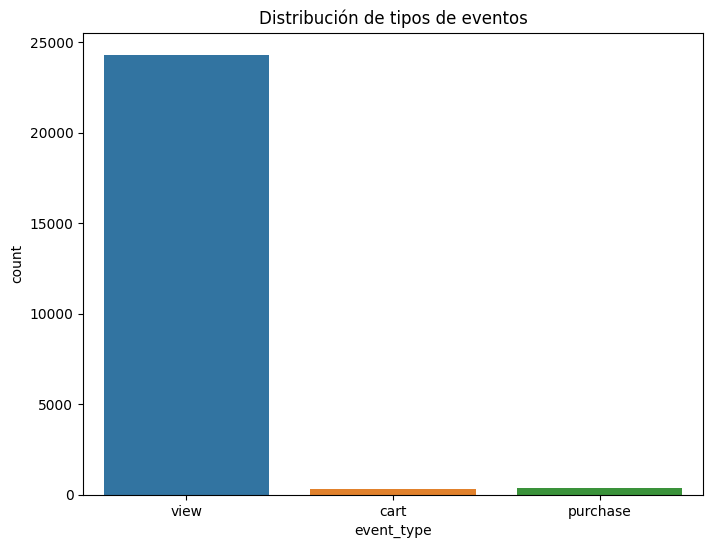

In [8]:
# 2. Distribución de los tipos de eventos
plt.figure(figsize=(8,6))
sns.countplot(x='event_type', data=df)
plt.title('Distribución de tipos de eventos')
plt.show()

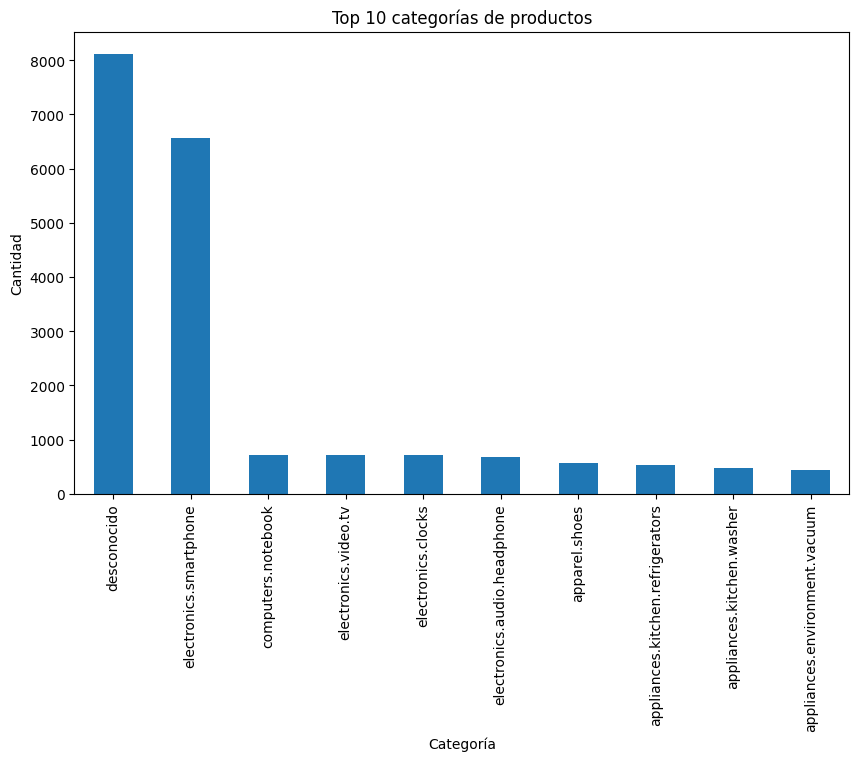

In [9]:
# 3. Distribución de las categorías de productos
plt.figure(figsize=(10,6))
df['category_code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 categorías de productos')
plt.ylabel('Cantidad')
plt.xlabel('Categoría')
plt.show()

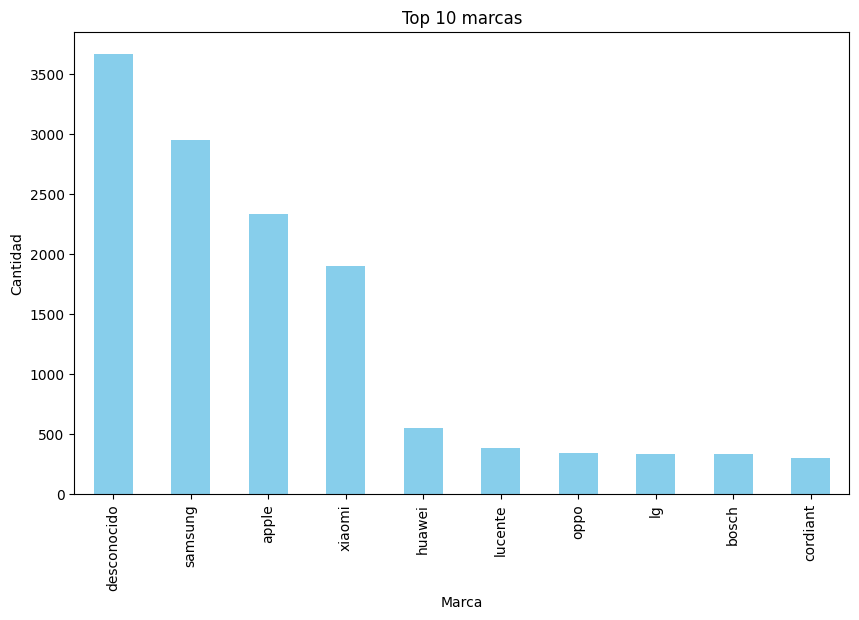

In [10]:
# 4. Distribución de marcas (top 10)
plt.figure(figsize=(10,6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 marcas')
plt.ylabel('Cantidad')
plt.xlabel('Marca')
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


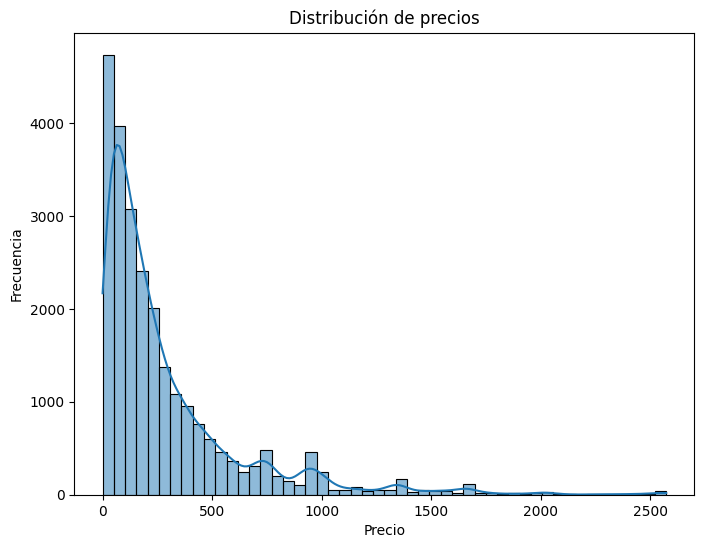

In [11]:
# 5. Distribución de los precios
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


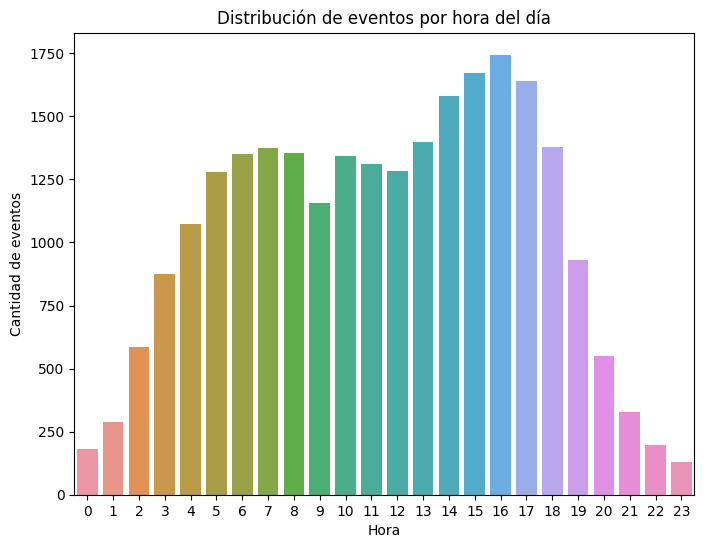

In [12]:
# 6. Análisis de eventos a lo largo del día (columna 'hour')
plt.figure(figsize=(8,6))
sns.countplot(x='hour', data=df)
plt.title('Distribución de eventos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de eventos')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


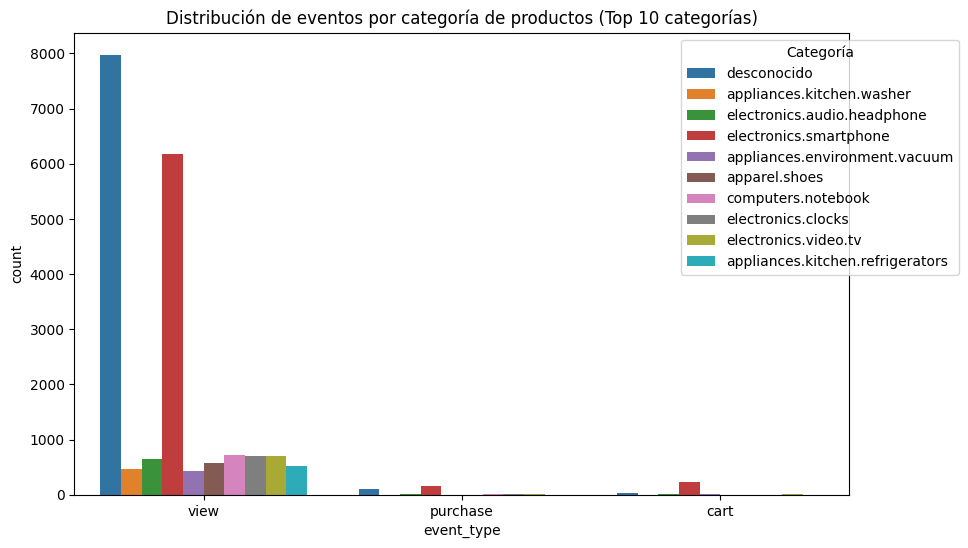

In [13]:
# 7. Eventos por categoría de producto
# Obtener las 10 categorías más frecuentes
top_10_categorias = df['category_code'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 categorías
df_top_10_categorias = df[df['category_code'].isin(top_10_categorias)]

# Crear el gráfico de barras con las top 10 categorías
plt.figure(figsize=(10,6))
sns.countplot(x='event_type', hue='category_code', data=df_top_10_categorias, order=df['event_type'].value_counts().index)
plt.title('Distribución de eventos por categoría de productos (Top 10 categorías)')
plt.legend(title='Categoría', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


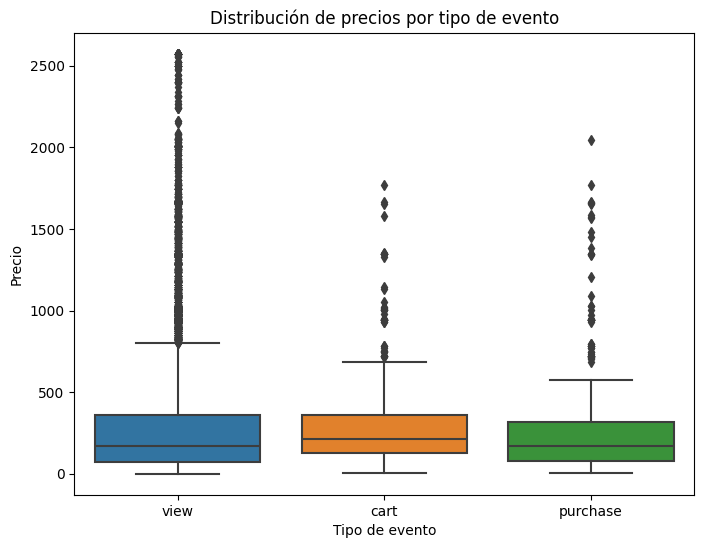

In [14]:
# 8. Relación entre precio y eventos
plt.figure(figsize=(8,6))
sns.boxplot(x='event_type', y='price', data=df)
plt.title('Distribución de precios por tipo de evento')
plt.xlabel('Tipo de evento')
plt.ylabel('Precio')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


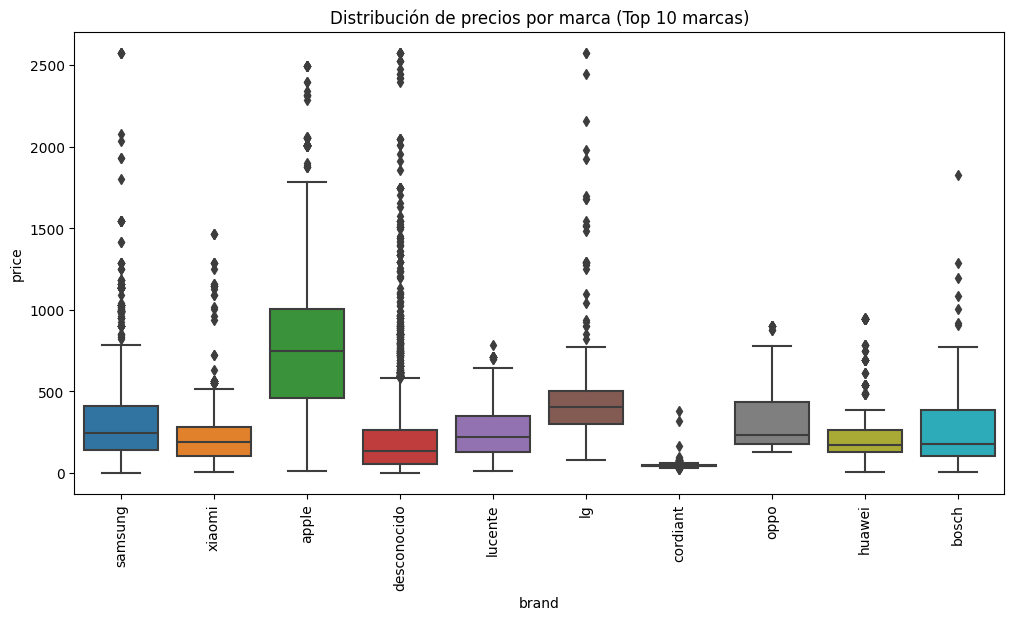

In [15]:
# 9. Relación entre precios y marcas
# Obtener las 10 marcas más frecuentes
top_10_marcas = df['brand'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 marcas
df_top_10_marcas = df[df['brand'].isin(top_10_marcas)]

# Crear el gráfico de caja con las top 10 marcas
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=df_top_10_marcas)
plt.title('Distribución de precios por marca (Top 10 marcas)')
plt.xticks(rotation=90)
plt.show()

## Modelo PCA

In [16]:
num = df.iloc[:,[2,3,6]]
num

,product_id,category_id,price
0,2500962,2053013564003713919,463.20
1,9600155,2053013561185141473,468.19
2,14700670,2053013557133443581,123.53
3,3600145,2053013563810775923,169.63
4,18000258,2053013558525952589,6.41
...,...,...,...
24995,1003852,2053013555631882655,229.07
24996,5301045,2053013563173241677,9.24
24997,4804055,2053013554658804075,188.94
24998,13400422,2053013557066334713,99.87


In [17]:
kmo,kmo_modelo = calculate_kmo(num)
kmo_modelo

NameError: name 'calculate_kmo' is not defined

Dado que el índice es igual a 0.5, la adecuación muestral para un análisis factorial es aceptable.

## Analisis de componentes principales

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(num)
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

n_components = modelo_pca.components_.shape[0]

index_names = [f'PC{i+1}' for i in range(n_components)]

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = num.columns,
    index = index_names
)

,product_id,category_id,price
PC1,0.685591,0.620171,-0.381252
PC2,0.077178,0.458837,0.885162
PC3,0.723884,-0.636284,0.266711


In [ ]:
print(modelo_pca.explained_variance_ratio_)

[0.53525046 0.31229684 0.1524527 ]


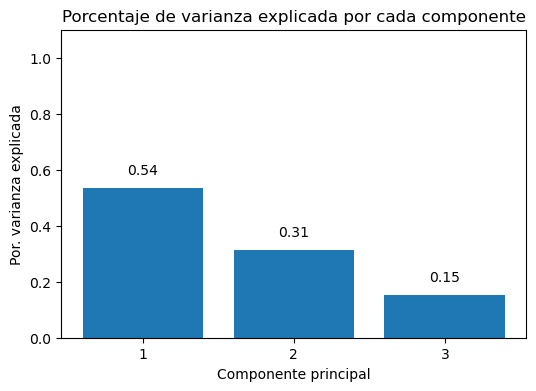

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.53525046 0.8475473  1.        ]


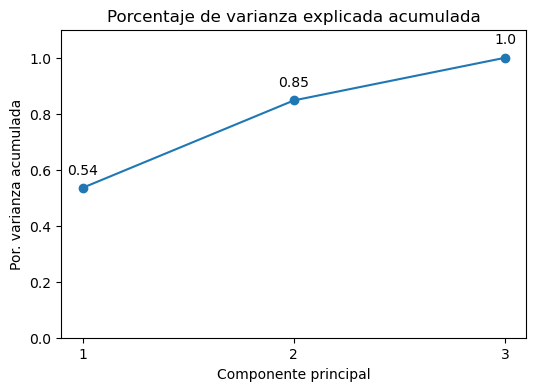

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

# Modelo de Redes Neuronales

Se redimensiono y reestructuró el dataset con fines de poder hacer modelos de series temporales para redes neuronales, en donde se redujeron los eventos en intervalos de 5 minutos.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Cargar el dataset reducido
data = pd.read_csv('reduced_dataset.csv', parse_dates=['5min_interval'], index_col='5min_interval')

# Seleccionar la columna de interés (purchase)
purchase_series = data['purchase'].values.reshape(-1, 1)

# Escalar los datos
scaler = MinMaxScaler()
purchase_series_scaled = scaler.fit_transform(purchase_series)

In [6]:
# Crear datos en ventanas para entrenamiento
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [7]:
# Definir longitud de la secuencia
seq_length = 12  # Ejemplo: usar las últimas 12 observaciones (1 hora si los intervalos son de 5 minutos)

# Crear secuencias de entrenamiento
X, y = create_sequences(purchase_series_scaled, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
from tensorflow.keras.optimizers import Adam

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predicción de un solo valor

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0084 - val_loss: 7.6556e-05
Epoch 2/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 6.1768e-05
Epoch 3/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 7.2168e-05
Epoch 4/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 7.6237e-05
Epoch 5/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 6.5224e-05
Epoch 6/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 6.1671e-05
Epoch 7/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 5.4901e-05
Epoch 8/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 6.0374e-05
Epoch 9/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 5.2413e-05
Epoch 10/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 5.7336e-05
Epoch 11/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 5.4217e-05
Epoch 12

In [10]:
# Predecir en los datos de prueba
predictions = model.predict(X_test)

# Reescalar las predicciones
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calcular el error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'Error cuadrático medio (RMSE): {rmse}')


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Error cuadrático medio (RMSE): 16.56094724059016


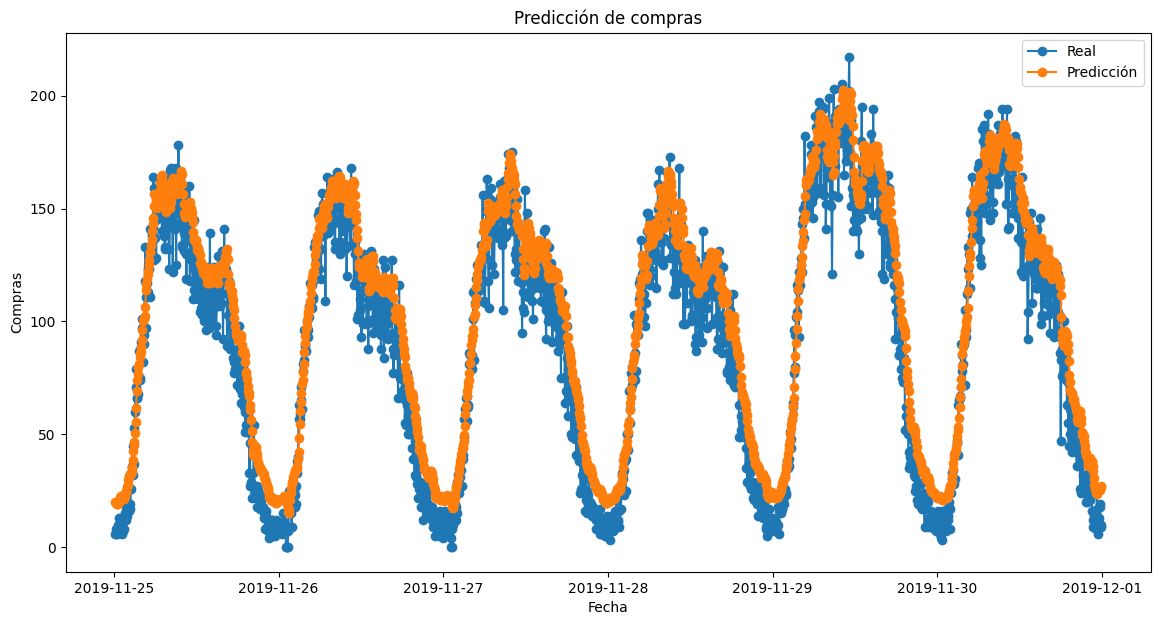

In [11]:
import matplotlib.pyplot as plt

#hacer que eje x representa el tiempo
time = data.index[seq_length + split:]

plt.figure(figsize=(14, 7))
plt.plot(time, y_test_rescaled, label='Real', marker='o')
plt.plot(time, predictions_rescaled, label='Predicción', marker='o')
plt.title('Predicción de compras')
plt.xlabel('Fecha')
plt.ylabel('Compras')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100}%")

MAE: 13.768561851660595
RMSE: 16.56094724059016
MAPE: 3.1692443736614132e+16%


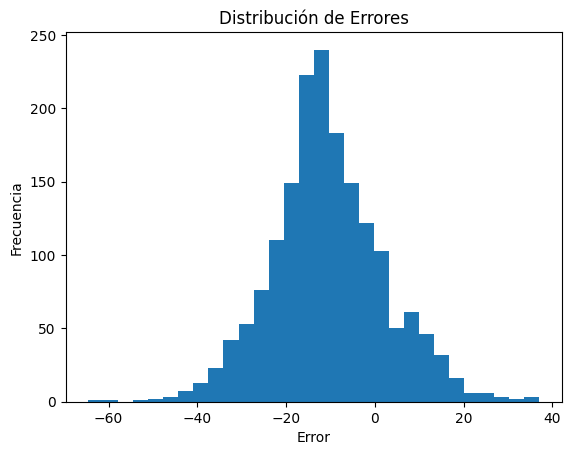

In [14]:
errores = y_test_rescaled - predictions_rescaled
plt.hist(errores, bins=30)
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(errores)
print(f"Durbin-Watson: {dw}")


Durbin-Watson: [0.81754352]


In [16]:
# Función para predecir los próximos n intervalos
def predict_future(model, last_sequence, n_steps):
    predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_steps):
        # Predecir el siguiente valor
        next_pred = model.predict(current_sequence.reshape(1, seq_length, 1))
        predictions.append(next_pred[0, 0])
        
        # Actualizar la secuencia para la siguiente predicción
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred
    
    return np.array(predictions)



In [17]:
# Obtener la última secuencia conocida
last_sequence = purchase_series_scaled[-seq_length:]

# Calcular cuántos intervalos de 5 minutos hay en una semana
intervals_in_week = 24 * 12  # 7 días * 24 horas * 12 intervalos de 5 minutos

# Predecir la primera semana de diciembre
future_scaled = predict_future(model, last_sequence, intervals_in_week)

# Reescalar las predicciones
future_predictions = scaler.inverse_transform(future_scaled.reshape(-1, 1))

# Crear índice de fechas para la primera semana de diciembre
last_date = data.index[-1]
future_dates = pd.date_range(
    start='2019-12-01',
    periods=intervals_in_week,
    freq='5min'
)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━

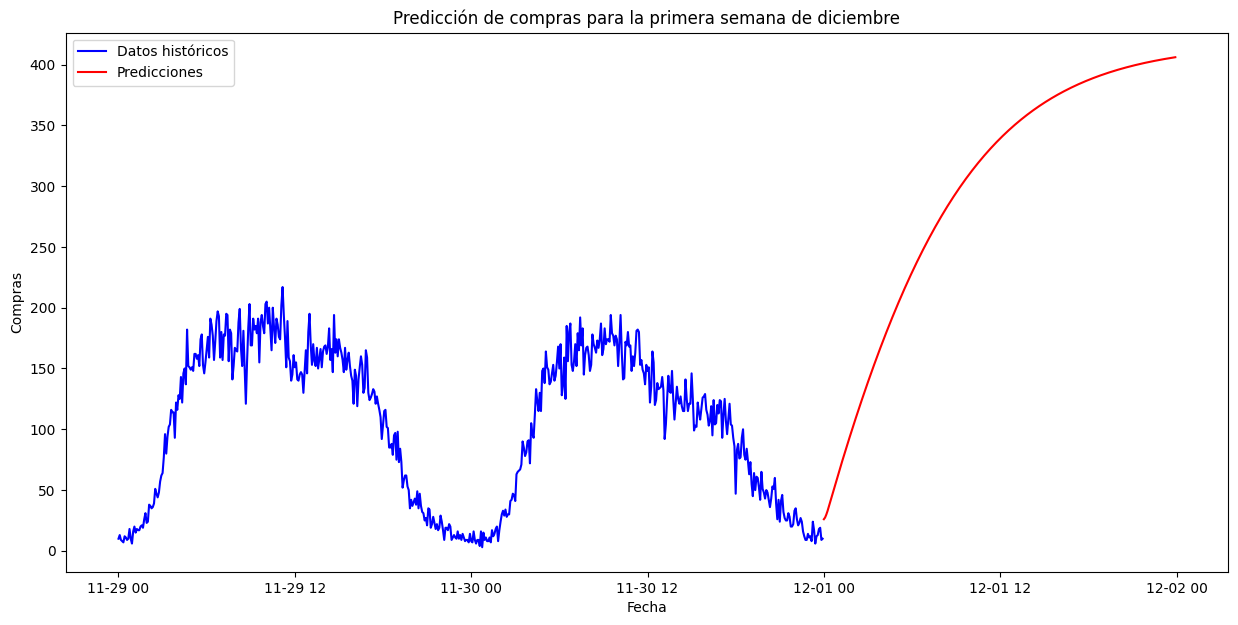

In [18]:
# Visualizar las predicciones
plt.figure(figsize=(15, 7))
# Plotear los últimos 2 días de datos reales
plt.plot(data.index[-576:], data['purchase'].values[-576:], 
         label='Datos históricos', color='blue')
# Plotear las predicciones del archivo csv 
plt.plot(future_dates, future_predictions, 
         label='Predicciones', color='red')
plt.title('Predicción de compras para la primera semana de diciembre')
plt.xlabel('Fecha')
plt.ylabel('Compras')
plt.legend()
plt.show()




In [19]:
# Guardar las predicciones en un DataFrame
predictions_df = pd.DataFrame({
    'timestamp': future_dates,
    'predicted_purchases': future_predictions.flatten()
})

# Guardar en CSV
predictions_df.to_csv('predictions_december_week1.csv', index=False)

print("Las predicciones han sido guardadas en 'predictions_december_week1.csv'")

Las predicciones han sido guardadas en 'predictions_december_week1.csv'
